In [37]:
import pandas as pd
import numpy as np
## Import pandas and numpy for processing dataframe

In [38]:
## Read data and pre-processing##

In [39]:
df1 = pd.read_excel("C:/Users/cs321/Desktop/csPCa/1-s2.0-S2352340922008885-mmc1.xls",sheet_name=0)
df2 = pd.read_excel("C:/Users/cs321/Desktop/csPCa/1-s2.0-S2352340922008885-mmc1.xls",sheet_name=1)
##Read the data set

In [40]:
df1.head()
## Check the dataset

,Age,PSA,Volume,PSAD,PIRADS,ISUP
0,48,2.91,50.0,0.058200,1,0
1,54,12.30,55.0,0.223636,2,0
2,69,5.91,37.2,0.158871,2,0
3,46,3.02,14.0,0.215714,2,0
4,65,5.64,102.5,0.055024,2,0


In [41]:
df2.head()

,PIRADS,Gleason_SB_TB,Gleason_TB,Gleason_SB,Scanner,IL_Localisation*,IL_Diameter*
0,1.0,0,0.0,0.0,3.0,2,7.0
1,2.0,0,0.0,0.0,1.0,1,18.0
2,2.0,0,0.0,0.0,1.0,2,8.0
3,2.0,0,0.0,0.0,1.0,1,15.0
4,2.0,0,0.0,0.0,1.0,1,12.0


In [42]:
df1.info()
##Check the data type of the dataset features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     785 non-null    int64  
 1   PSA     774 non-null    float64
 2   Volume  765 non-null    float64
 3   PSAD    765 non-null    float64
 4   PIRADS  785 non-null    int64  
 5   ISUP    785 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 36.9 KB


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PIRADS            785 non-null    float64
 1   Gleason_SB_TB     786 non-null    object 
 2   Gleason_TB        785 non-null    float64
 3   Gleason_SB        785 non-null    float64
 4   Scanner           744 non-null    float64
 5   IL_Localisation*  752 non-null    object 
 6   IL_Diameter*      758 non-null    float64
dtypes: float64(5), object(2)
memory usage: 43.2+ KB


In [44]:
#df2 = df2.drop(df2.columns[[0]], axis = 1)
df1.columns =['Age','PSA','Volume','PSAD','PIRADS_First','ISUP']
df2.columns =['PIRADS_Biopsy','Gleason_SB_TB','Gleason_TB','Gleason_SB','Scanner','IL_Localisation','IL_Diameter']
df = pd.concat([df1,df2],axis=1)
##Connected Data Sets

In [45]:
df.head(800)

,Age,PSA,Volume,PSAD,PIRADS_First,ISUP,PIRADS_Biopsy,Gleason_SB_TB,Gleason_TB,Gleason_SB,Scanner,IL_Localisation,IL_Diameter
0,48.0,2.91,50.0,0.058200,1.0,0.0,1.0,0,0.0,0.0,3.0,2,7.0
1,54.0,12.30,55.0,0.223636,2.0,0.0,2.0,0,0.0,0.0,1.0,1,18.0
2,69.0,5.91,37.2,0.158871,2.0,0.0,2.0,0,0.0,0.0,1.0,2,8.0
3,46.0,3.02,14.0,0.215714,2.0,0.0,2.0,0,0.0,0.0,1.0,1,15.0
4,65.0,5.64,102.5,0.055024,2.0,0.0,2.0,0,0.0,0.0,1.0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,67.0,12.87,44.5,0.289213,5.0,5.0,5.0,10,10.0,9.0,1.0,2,10.0
783,77.0,1.56,47.1,0.033121,5.0,5.0,5.0,10,10.0,10.0,1.0,1,18.0
784,65.0,6.34,25.0,0.253600,5.0,5.0,5.0,10,10.0,10.0,2.0,2,15.0
785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.dropna(inplace=True) 
## Delete empty values

In [47]:
df[["Gleason_SB_TB"]] = df[["Gleason_SB_TB"]].astype(int)
df = df.drop([414])
df[["IL_Localisation"]] = df[["IL_Localisation"]].astype(int)
##Converting feature data types

In [48]:
df["csPCa"] = df["ISUP"].map(lambda x: 1 if x>=2 else 0)
##Judgment of csPCa by ISUP score >= 2

In [49]:
df.info()
###Find Missing Values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 784
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              717 non-null    float64
 1   PSA              717 non-null    float64
 2   Volume           717 non-null    float64
 3   PSAD             717 non-null    float64
 4   PIRADS_First     717 non-null    float64
 5   ISUP             717 non-null    float64
 6   PIRADS_Biopsy    717 non-null    float64
 7   Gleason_SB_TB    717 non-null    int32  
 8   Gleason_TB       717 non-null    float64
 9   Gleason_SB       717 non-null    float64
 10  Scanner          717 non-null    float64
 11  IL_Localisation  717 non-null    int32  
 12  IL_Diameter      717 non-null    float64
 13  csPCa            717 non-null    int64  
dtypes: float64(11), int32(2), int64(1)
memory usage: 78.4 KB


In [50]:
df.isnull().sum()
##View Null

Age                0
PSA                0
Volume             0
PSAD               0
PIRADS_First       0
ISUP               0
PIRADS_Biopsy      0
Gleason_SB_TB      0
Gleason_TB         0
Gleason_SB         0
Scanner            0
IL_Localisation    0
IL_Diameter        0
csPCa              0
dtype: int64

# Statistical analysis of data

In [52]:
df.describe()

,Age,PSA,Volume,PSAD,PIRADS_First,ISUP,PIRADS_Biopsy,Gleason_SB_TB,Gleason_TB,Gleason_SB,Scanner,IL_Localisation,IL_Diameter,csPCa
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.00000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,64.527197,10.087894,54.599861,0.223974,3.919107,1.32357,3.916318,3.920502,3.351464,3.022315,1.400279,1.576011,13.684798,0.414226
std,9.258600,7.194699,31.521768,0.200769,0.781515,1.47177,0.779431,3.532465,3.600402,3.491939,0.732448,0.688196,5.025461,0.492932
min,30.000000,0.600000,9.000000,0.015789,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000
25%,58.000000,5.820000,33.000000,0.113816,3.000000,0.00000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.000000,0.000000
50%,65.000000,8.030000,47.000000,0.171429,4.000000,1.00000,4.000000,6.000000,0.000000,0.000000,1.000000,1.000000,13.000000,0.000000
75%,72.000000,12.010000,66.000000,0.259709,4.000000,2.00000,4.000000,7.000000,7.000000,7.000000,2.000000,2.000000,15.000000,1.000000
max,87.000000,74.000000,313.000000,2.475769,5.000000,5.00000,5.000000,10.000000,10.000000,10.000000,4.000000,8.000000,43.000000,1.000000


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

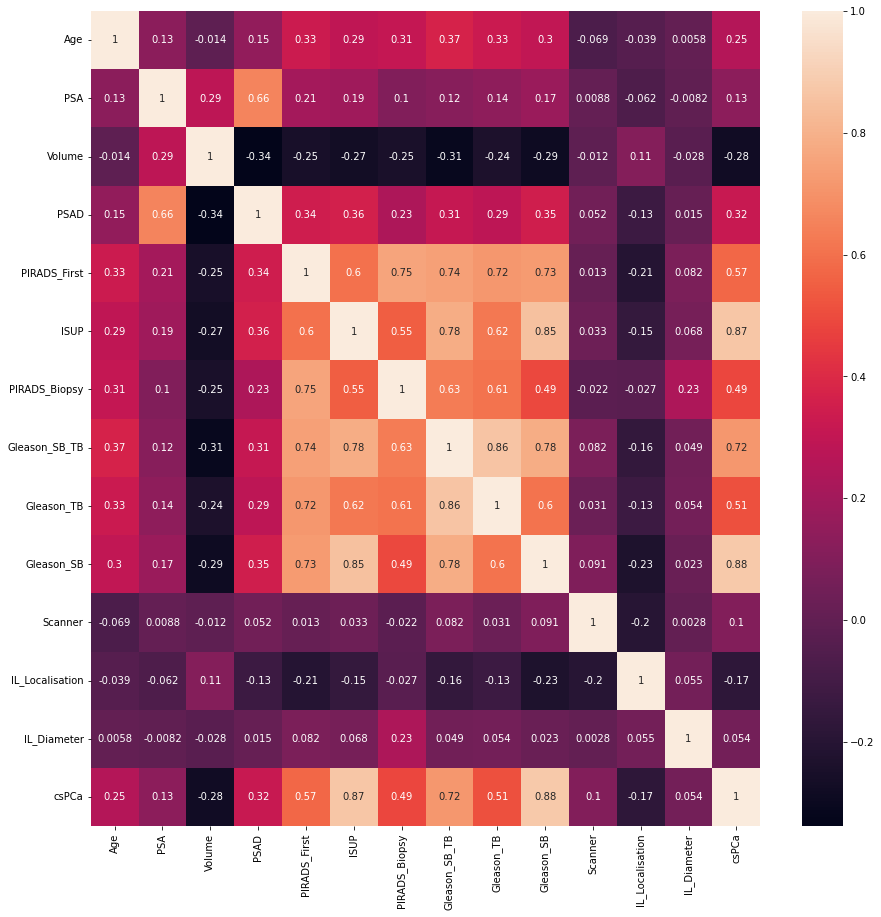

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
##Generate correlation matrix

In [55]:
##The degree of effect of different features on csPCa can be seen in the correlation matrix,
##and the degree of interaction between features

In [56]:
##Feature Engineering

In [57]:
###The following features exclude diagnostic strategies that have been calculated for the feature equation of ISUP with csPCa
num_cols_MRI = ['Age','PSA','Volume','PSAD','PIRADS_First','IL_Localisation','IL_Diameter']
### If csPCa is predicted from primary screening MRI data only
num_cols_SB = ['Age','PSA','Volume','PSAD','PIRADS_First','Gleason_SB','IL_Localisation','IL_Diameter']
###If the biopsy was done after passing the initial screening only systematic biopsy(SB)
num_cols_TB = ['Age','PSA','Volume','PSAD','PIRADS_First','PIRADS_Biopsy','Gleason_TB','Scanner','IL_Localisation','IL_Diameter']
###If the biopsy was done after passing the initial screening only MRI-targeted biopsy(TB) 
num_cols_SBTB = ['Age','PSA','Volume','PSAD','PIRADS_First','PIRADS_Biopsy','Gleason_SB_TB','Gleason_TB','Gleason_SB','Scanner','IL_Localisation','IL_Diameter']
### If the biopsy was done after passing the initial screening TB+SB

In [58]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
##Numeric value field normalization

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
###Import the library for dividing the training set and the test set
###Import the sklearn library for RandomForestClassifier
###Import the sklearn library for RidgeClassifier
###Import the library for evaluating models

In [61]:
def Random_Models(df,num_cols,Y,Bool_OutputModel):##Define a Random forest method to facilitate the application of different diagnostic strategies
    num_features = standardScaler.fit_transform(df[num_cols])## Normalization of data ranges for features
    X=num_features
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.4)## Divide the training set and test set by 6 vs 4
    random_model = RandomForestClassifier()## Define a RandomForestClassifier object,
    random_model.fit(X_train,Y_train)##Matching training set
    Y_pred = random_model.predict(X_test)##Assign the prediction result to Y_pred
    random_train_score = random_model.score(X_train,Y_train)##Training set score
    random_test_score=random_model.score(X_test,Y_test)##Test Set Score
    print('Random forest training set score: '+str(random_train_score) +'\nRandom Forest Test Set Score: '+str(random_test_score)+'\n'+classification_report(Y_test, Y_pred))    
    if Bool_OutputModel:
        return random_model ##If 1 then return RandomForestClassifier object,If 0 only the evaluation report is returned
    else:
        return 
print('Random forest MRI')
Random_Models(df,num_cols_MRI,df['csPCa'],0)
print('\nRandom Forest Systematic Biopsy')
Random_Models(df,num_cols_SB,df['csPCa'],0)
print('\nRandom Forest Targeted Biopsy')
Random_Models(df,num_cols_TB,df['csPCa'],0)
print('\nRandom Forest SB+TB')
Random_Models(df,num_cols_SBTB,df['csPCa'],0)


Random forest MRI
Random forest training set score: 1.0
Random Forest Test Set Score: 0.7630662020905923
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       165
           1       0.74      0.68      0.71       122

    accuracy                           0.76       287
   macro avg       0.76      0.75      0.75       287
weighted avg       0.76      0.76      0.76       287


Random Forest Systematic Biopsy
Random forest training set score: 0.9976744186046511
Random Forest Test Set Score: 0.9372822299651568
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       164
           1       0.91      0.95      0.93       123

    accuracy                           0.94       287
   macro avg       0.93      0.94      0.94       287
weighted avg       0.94      0.94      0.94       287


Random Forest Targeted Biopsy
Random forest training set score: 1.0
Random Forest Test Set Score: 0.80487

In [62]:
##Define a LinearClassifier method to facilitate the application of different diagnostic strategies
##The steps are the same as for Random Forest
def Lr_Models(df,num_cols,Y,Bool_OutputModel):   
    num_features = standardScaler.fit_transform(df[num_cols])
    X=num_features
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.4)
    lr_model=RidgeClassifier()
    lr_model.fit(X_train,Y_train)
    lr_model.score(X_train,Y_train)
    lr_model.score(X_test,Y_test)
    Y_pred = lr_model.predict(X_test)
    lr_train_score = lr_model.score(X_train,Y_train)
    lr_test_score=lr_model.score(X_test,Y_test)
    print('Linear regression training set score:'+str(lr_train_score) +'\nLinear regression test set score: '+str(lr_test_score)+'\n'+classification_report(Y_test, Y_pred))
    if Bool_OutputModel:
        return lr_model
    else:
        return 
print('Linear Classification MRI')
Lr_Models(df,num_cols_MRI,df['csPCa'],0)
print('\nLinear Classification Systematic Biopsy')
Lr_Models(df,num_cols_SB,df['csPCa'],0)
print('\nLinear Classification Targeted Biopsy')
Lr_Models(df,num_cols_TB,df['csPCa'],0)
print('\nLinear Classification SB+TB')
Lr_Models(df,num_cols_SBTB,df['csPCa'],0)

Linear Classification MRI
Linear regression training set score:0.7651162790697674
Linear regression test set score: 0.7979094076655052
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       170
           1       0.77      0.72      0.74       117

    accuracy                           0.80       287
   macro avg       0.79      0.79      0.79       287
weighted avg       0.80      0.80      0.80       287


Linear Classification Systematic Biopsy
Linear regression training set score:0.9348837209302325
Linear regression test set score: 0.9616724738675958
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       162
           1       0.94      0.98      0.96       125

    accuracy                           0.96       287
   macro avg       0.96      0.96      0.96       287
weighted avg       0.96      0.96      0.96       287


Linear Classification Targeted Biopsy
Linear regression trai

In [63]:
###Model export for deployment
model_dir = "C:/Users/cs321/Desktop/csPCa"
import joblib

In [64]:
num_features = standardScaler.fit_transform(df[num_cols_MRI])
joblib.dump(standardScaler,f"{model_dir}/standardScaler_MRI.joblib")
joblib.dump(Random_Models(df,num_cols_MRI,df['csPCa'],1),f"{model_dir}/Random_Models_MRI.joblib")

Random forest training set score: 1.0
Random Forest Test Set Score: 0.7456445993031359
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       155
           1       0.80      0.59      0.68       132

    accuracy                           0.75       287
   macro avg       0.76      0.73      0.73       287
weighted avg       0.76      0.75      0.74       287



['C:/Users/cs321/Desktop/Model/Random_Models_MRI.joblib']

In [65]:
num_features = standardScaler.fit_transform(df[num_cols_SB])
joblib.dump(standardScaler,f"{model_dir}/standardScaler_SB.joblib")
joblib.dump(Random_Models(df,num_cols_SB,df['csPCa'],1),f"{model_dir}/Random_Models_SB.joblib")

Random forest training set score: 1.0
Random Forest Test Set Score: 0.9303135888501742
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       152
           1       0.93      0.93      0.93       135

    accuracy                           0.93       287
   macro avg       0.93      0.93      0.93       287
weighted avg       0.93      0.93      0.93       287



['C:/Users/cs321/Desktop/Model/Random_Models_SB.joblib']

In [66]:
num_features = standardScaler.fit_transform(df[num_cols_TB])
joblib.dump(standardScaler,f"{model_dir}/standardScaler_TB.joblib")
joblib.dump(Random_Models(df,num_cols_TB,df['csPCa'],1),f"{model_dir}/Random_Models_TB.joblib")

Random forest training set score: 1.0
Random Forest Test Set Score: 0.7456445993031359
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       169
           1       0.73      0.61      0.66       118

    accuracy                           0.75       287
   macro avg       0.74      0.73      0.73       287
weighted avg       0.74      0.75      0.74       287



['C:/Users/cs321/Desktop/Model/Random_Models_TB.joblib']

In [67]:
num_features = standardScaler.fit_transform(df[num_cols_SBTB])
joblib.dump(standardScaler,f"{model_dir}/standardScaler_SBTB.joblib")
joblib.dump(Random_Models(df,num_cols_SBTB,df['csPCa'],1),f"{model_dir}/Random_Models_SBTB.joblib")

Random forest training set score: 1.0
Random Forest Test Set Score: 0.9477351916376306
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       161
           1       0.97      0.91      0.94       126

    accuracy                           0.95       287
   macro avg       0.95      0.94      0.95       287
weighted avg       0.95      0.95      0.95       287



['C:/Users/cs321/Desktop/Model/Random_Models_SBTB.joblib']

In [68]:
df.sample(1).to_json()

'{"Age":{"615":57.0},"PSA":{"615":14.97},"Volume":{"615":84.0},"PSAD":{"615":0.1782142857},"PIRADS_First":{"615":5.0},"ISUP":{"615":1.0},"PIRADS_Biopsy":{"615":4.0},"Gleason_SB_TB":{"615":7},"Gleason_TB":{"615":7.0},"Gleason_SB":{"615":7.0},"Scanner":{"615":3.0},"IL_Localisation":{"615":1},"IL_Diameter":{"615":14.0},"csPCa":{"615":0}}'